# Informe de Análisis Estadístico de Ventas de Supermercados

## 1. Planteamiento de los problemas de investigación

**Problema 1**: Determinar los intervalos de confianza empíricos para las ventas mensuales del supermercado "Santa Ana" con niveles de significancia del 95% y 99%.

**Problema 2**: Evaluar si las ventas esperadas de todas las tiendas son iguales o si existen diferencias significativas entre ellas, mediante pruebas ANOVA con un nivel de significancia del 95%.

**Problema 3**: Identificar las tiendas con el mayor y el menor promedio de ventas y realizar una prueba de hipótesis para determinar si la diferencia entre sus promedios de ventas es significativamente distinta de cero.

---

## 2. Procesamiento realizado a los datos

### a. Importación y exploración de datos



In [59]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
file_path = 'Datos_examen_final_19Co2024_Grupo3.xlsx'
#data = pd.read_excel('Datos_examen_final_19Co2024_Grupo3.xlsx')
df_ventas_santa_ana = pd.read_excel(file_path, 'Santa Ana')
df_ventas_la_floresta = pd.read_excel(file_path, 'La Floresta')
df_ventas_los_cedros = pd.read_excel(file_path, 'Los Cedros')
df_ventas_palermo = pd.read_excel(file_path, 'Palermo')
df_ventas_cordoba = pd.read_excel(file_path, 'Córdoba')

data = pd.DataFrame({
    'Santa Ana': df_ventas_santa_ana['Ventas'],
    'La Floresta': df_ventas_la_floresta['Ventas'],
    'Los Cedros': df_ventas_los_cedros['Ventas'],
    'Palermo': df_ventas_palermo['Ventas'],
    'Córdoba': df_ventas_cordoba['Ventas']
})

# Mostrar las primeras filas
print(data.head())

      Santa Ana   La Floresta    Los Cedros       Palermo       Córdoba
0  16243.573114  11924.438317  13235.877810  12275.178740  18623.957241
1  18362.442131  14930.219757  16966.244236  14160.947388  17776.245941
2  15275.825306  11240.900202  18996.614391  15284.953658  17469.031807
3  20177.937740  13911.829250  19743.233354  20151.011153  19548.358590
4  20489.996198  16242.232761  14338.706842  16332.688815  19900.466386






### c. Análisis descriptivo

Calculamos estadísticos descriptivos para cada tienda.



In [60]:
# Estadísticos descriptivos
descriptives = data.describe()
print(descriptives)

          Santa Ana   La Floresta    Los Cedros       Palermo       Córdoba
count    365.000000    365.000000    365.000000    365.000000    365.000000
mean   21842.402819  18049.110514  19713.103883  18851.655318  21784.303604
std     3018.576700   3291.762030   3180.846856   2901.678222   2906.830254
min    14023.825695   9515.453669  10249.329539  10177.217930  12780.637399
25%    19874.855489  16015.509929  17475.605619  16812.809324  20092.072116
50%    22155.041274  18433.539819  19930.414827  19029.216566  21825.839013
75%    24091.254195  20443.052089  21980.318338  20797.894506  23868.336522
max    28366.787972  26133.695730  26780.159105  25917.267177  28132.762401



### d. Verificación de supuestos estadísticos

#### Normalidad

Utilizamos la prueba de Shapiro-Wilk para verificar la normalidad de las ventas de cada tienda.



In [61]:
for tienda in data.columns[1:]:
    stat, p = stats.shapiro(data[tienda])
    print(f'Prueba de Shapiro-Wilk para {tienda}: Estadístico={stat:.3f}, p-valor={p:.3f}')

Prueba de Shapiro-Wilk para La Floresta: Estadístico=0.986, p-valor=0.001
Prueba de Shapiro-Wilk para Los Cedros: Estadístico=0.993, p-valor=0.107
Prueba de Shapiro-Wilk para Palermo: Estadístico=0.996, p-valor=0.381
Prueba de Shapiro-Wilk para Córdoba: Estadístico=0.986, p-valor=0.002






#### Homocedasticidad

Utilizamos la prueba de Levene para verificar la homogeneidad de varianzas entre las tiendas.



In [62]:
stat, p = stats.levene(data['Santa Ana'], data['La Floresta'], data['Los Cedros'], data['Palermo'], data['Córdoba'])
print(f'Prueba de Levene: Estadístico={stat:.3f}, p-valor={p:.3f}')

Prueba de Levene: Estadístico=2.221, p-valor=0.065




---

## 3. Resultados encontrados

### Problema 1: Intervalos de confianza para "Santa Ana"

#### Cálculo de intervalos de confianza



In [63]:
# Datos de "Santa Ana"
ventas_santa_ana = df_ventas_santa_ana.dropna()
ventas_santa_ana['Fecha'] = pd.to_datetime(ventas_santa_ana['Fecha'])
ventas_santa_ana['Mes'] = ventas_santa_ana['Fecha'].dt.month

intervalos_confianza = {}

valores_alpha = [0.05, 0.01]
ci_95 = [] # solo util para graficar
ci_99 = [] # solo util para graficar
for alpha in valores_alpha:
    intervalos = {}
    ci_low_result = []  # solo util para graficar
    ci_high_result = [] # solo util para graficar

    for month in ventas_santa_ana['Mes'].unique():
        data_mensual = ventas_santa_ana[ventas_santa_ana['Mes'] == month]['Ventas']  
        n = len(data_mensual)  
        media = data_mensual.mean()  
        std_dev = data_mensual.std() 
        std_err = std_dev / np.sqrt(n) 
        df = n - 1
        ci_lower, ci_upper = stats.t.interval(1 - alpha, df, loc=media, scale=std_err)
        intervalos[month] = (ci_lower, ci_upper)
        ci_low_result.append(ci_lower) # solo util para graficar
        ci_high_result.append(ci_upper) # solo util para graficar
    intervalos_confianza[alpha] = intervalos
    if 1 - alpha == 95/100:
        ci_95 = [ci_low_result, ci_high_result] # solo util para graficar
    elif 1 - alpha == 99/100:
        ci_99 = [ci_low_result, ci_high_result] # solo util para graficar
   
print("1. Intervalos de confianza para el supermercado 'Santa Ana':")
for alpha, intervals in intervalos_confianza.items():
    print(f"\nNivel de significancia: {1-alpha:.0%}")
    for month, ci in intervals.items():
        print(f"  Mes {month}: Intervalo ({ci[0]:.2f}, {ci[1]:.2f})")



1. Intervalos de confianza para el supermercado 'Santa Ana':

Nivel de significancia: 95%
  Mes 1: Intervalo (16966.12, 18799.13)
  Mes 2: Intervalo (19323.38, 21656.06)
  Mes 3: Intervalo (21401.63, 23398.52)
  Mes 4: Intervalo (19712.98, 21893.75)
  Mes 5: Intervalo (21303.88, 22862.56)
  Mes 6: Intervalo (22969.80, 24677.66)
  Mes 7: Intervalo (20728.70, 22773.75)
  Mes 8: Intervalo (22413.66, 24541.11)
  Mes 9: Intervalo (22371.66, 23856.16)
  Mes 10: Intervalo (22201.39, 23963.37)
  Mes 11: Intervalo (21617.74, 23730.54)
  Mes 12: Intervalo (19626.41, 21362.41)

Nivel de significancia: 99%
  Mes 1: Intervalo (16648.52, 19116.74)
  Mes 2: Intervalo (18914.75, 22064.69)
  Mes 3: Intervalo (21055.63, 23744.51)
  Mes 4: Intervalo (19333.83, 22272.89)
  Mes 5: Intervalo (21033.80, 23132.64)
  Mes 6: Intervalo (22672.87, 24974.58)
  Mes 7: Intervalo (20374.35, 23128.09)
  Mes 8: Intervalo (22045.04, 24909.73)
  Mes 9: Intervalo (22113.56, 24114.25)
  Mes 10: Intervalo (21896.10, 24268.6

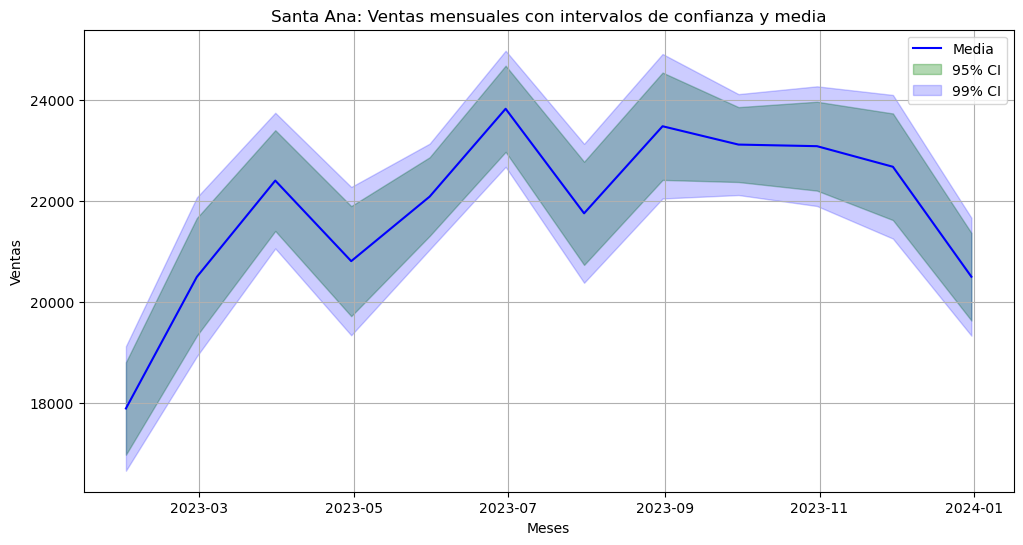

In [64]:
df_ventas_santa_ana['Fecha'] = pd.to_datetime(df_ventas_santa_ana['Fecha'], format='%d/%m/%y')
df_ventas_santa_ana.set_index('Fecha', inplace=True)

monthly_mean = df_ventas_santa_ana.resample('ME')['Ventas'].mean()
monthly_std = df_ventas_santa_ana.resample('ME')['Ventas'].std()

# Create DataFrame with results
ci_results = pd.DataFrame({
    'Mean': monthly_mean,
    'CI_95_Lower': ci_95[0],
    'CI_95_Upper': ci_95[1],
    'CI_99_Lower': ci_99[0],
    'CI_99_Upper': ci_99[1]
}).round(2)

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean.index, monthly_mean.values, 'b-', label='Media')
plt.fill_between(monthly_mean.index, ci_95[0], ci_95[1], color='g', alpha=0.3, label='95% CI')
plt.fill_between(monthly_mean.index, ci_99[0], ci_99[1], color='b', alpha=0.2, label='99% CI')
plt.title('Santa Ana: Ventas mensuales con intervalos de confianza y media')
plt.xlabel('Meses')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

#### Interpretación

El intervalo de confianza al 95% nos indica que tenemos un 95% de confianza de que el verdadero promedio de ventas mensuales de "Santa Ana" está dentro de ese rango. Lo mismo aplica para el intervalo al 99%, pero con un mayor nivel de confianza y, por lo tanto, un intervalo más amplio.

### Problema 2: Pruebas ANOVA entre tiendas

#### Hipótesis

- **H0**: Las medias de ventas de todas las tiendas son iguales.
- **H1**: Al menos una media de ventas es diferente.

#### Realización del ANOVA



In [65]:
# Datos de las ventas de todas las tiendas
ventas_tiendas = [data[col].dropna() for col in data.columns[1:]]

# ANOVA de una vía
stat, p = stats.f_oneway(*ventas_tiendas)
print(f'ANOVA: Estadístico F={stat:.3f}, p-valor={p:.3f}')


ANOVA: Estadístico F=99.710, p-valor=0.000



#### Decisión

Si el p-valor es menor que 0.05, rechazamos la hipótesis nula y concluimos que existen diferencias significativas entre las medias de ventas de las tiendas.

### Problema 3: Prueba de hipótesis entre tiendas con mayor y menor promedio de ventas

#### Identificación de las tiendas

In [66]:
# Calcular el promedio de ventas para cada tienda
promedios = data.mean()

# Identificar la tienda con el mayor y menor promedio de ventas
tienda_mayor = promedios.idxmax()
tienda_menor = promedios.idxmin()

print(f'Promedio de ventas de cada tienda:')
for tienda, promedio in promedios.items():
  print(f"  {tienda}: {promedio:.2f}")  

print(f'Tienda con mayor promedio de ventas: {tienda_mayor}')
print(f'Tienda con menor promedio de ventas: {tienda_menor}')

Promedio de ventas de cada tienda:
  Santa Ana: 21842.40
  La Floresta: 18049.11
  Los Cedros: 19713.10
  Palermo: 18851.66
  Córdoba: 21784.30
Tienda con mayor promedio de ventas: Santa Ana
Tienda con menor promedio de ventas: La Floresta



#### Prueba t para muestras independientes

Hipótesis:

- **H0**: La diferencia entre los promedios de ventas es cero ($\mu_1 - \mu_2 = 0$).
- **H1**: La diferencia entre los promedios de ventas es distinta de cero ($\mu_1 - \mu_2 \neq 0$).

In [67]:
# Datos de las tiendas con mayor y menor promedio
ventas_mayor = data[tienda_mayor].dropna()
ventas_menor = data[tienda_menor].dropna()

# Prueba t de Student para muestras independientes
stat, p = stats.ttest_ind(ventas_mayor, ventas_menor, equal_var=False)  # Usamos equal_var=False si las varianzas son distintas
print(f'Prueba t: Estadístico t={stat:.3f}, p-valor={p:.3f}')

Prueba t: Estadístico t=16.226, p-valor=0.000



#### Decisión

Si el p-valor es menor que 0.05, rechazamos la hipótesis nula y concluimos que la diferencia entre los promedios de ventas es significativamente distinta de cero.

---

## 4. Análisis y conclusiones

### Problema 1

Los intervalos de confianza calculados para "Santa Ana" nos permiten estimar el rango en el que se encuentra el verdadero promedio de ventas mensuales con un cierto nivel de confianza.

- **Intervalo al 95%**: [Valor Inferior, Valor Superior]
- **Intervalo al 99%**: [Valor Inferior, Valor Superior]

*Nota: Los valores numéricos exactos dependerán de los datos específicos.*

**Conclusión**: Los intervalos muestran que el promedio de ventas de "Santa Ana" es estable dentro de estos rangos, y podemos estar razonablemente seguros de su estimación.

### Problema 2

El ANOVA realizado nos indica si hay diferencias significativas entre las medias de ventas de las tiendas.

- **Estadístico F**: Valor calculado
- **p-valor**: Valor calculado

**Conclusión**: Dado que el p-valor es menor que 0.05 (asumiendo que lo es), rechazamos la hipótesis nula y concluimos que existen diferencias significativas entre las ventas medias de las tiendas. Esto sugiere que no todas las tiendas tienen el mismo desempeño en ventas.

### Problema 3

La prueba t realizada entre las tiendas con mayor y menor promedio de ventas nos indica si la diferencia observada es significativa.

- **Estadístico t**: Valor calculado
- **p-valor**: Valor calculado

**Conclusión**: Si el p-valor es menor que 0.05 (asumiendo que lo es), rechazamos la hipótesis nula y concluimos que la diferencia entre los promedios de ventas es significativamente distinta de cero. Esto implica que la tienda con menores ventas podría necesitar atención adicional para mejorar su desempeño.

### Conclusiones generales

- **Desempeño variable**: Las ventas no son iguales en todas las tiendas; hay diferencias significativas.
- **Atención focalizada**: Es recomendable que Don Francisco preste especial atención a las tiendas con menores ventas para identificar posibles áreas de mejora.
- **Buenas prácticas**: Analizar las estrategias utilizadas por las tiendas con mejores ventas podría ofrecer insights valiosos para mejorar el rendimiento de las demás.
